# What this file contains

-   Analysis of Ramsey sequence data

# Ramsey

In [1]:
from plot_functions import *

# import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import math

# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [2]:
# read data

import pandas as pd


f_path = "data/ramsey/Ramsey136643.csv"
ramsey136643 = pd.read_csv(f_path)

f_path = "data/ramsey/Ramsey136647.csv"
ramsey136647 = pd.read_csv(f_path)

f_path = "data/ramsey/Ramsey136649.csv"
ramsey136649 = pd.read_csv(f_path)

ramsey136643_x = ramsey136643.XData
ramsey136643_y = ramsey136643.YData
ramsey136643_y_err = ramsey136643.YError

ramsey136647_x = ramsey136647.XData
ramsey136647_y = ramsey136647.YData
ramsey136647_y_err = ramsey136647.YError

ramsey136649_x = ramsey136649.XData
ramsey136649_y = ramsey136649.YData
ramsey136649_y_err = ramsey136649.YError

In [3]:
# Guass and exponential decay function

def gaussiann(x, a, sigma, offset):
    # return a * np.exp(-(x)**2 / (2 * sigma**2)) + offset
    return a * np.exp(-(x) / (np.sqrt(2) * sigma)) + offset
    


def exponential_decay(t_D, offset, scaling_factor): #, offset):
    # return (offset + np.exp(-t_D / coherence_time)) # * offset
    return (offset * (1 + np.exp(-t_D / scaling_factor)) )


In [4]:
# fit gauss






# guassian fit 1

initial_guess_gauss = [0.9, 100, 0.5]
x_fit_gaussian_ramsey136643 = np.linspace(min(ramsey136643_x), max(ramsey136643_x), 1000)
popt, pcov = curve_fit(gaussiann, ramsey136643_x, ramsey136643_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136643 = gaussiann(x_fit_gaussian_ramsey136643, *initial_guess_gauss)
y_fit_gaussian_ramsey136643 = gaussiann(x_fit_gaussian_ramsey136643, *popt)



# guassian fit 2

initial_guess_gauss = [0.9, 100, 0.5]
x_fit_gaussian_ramsey136647 = np.linspace(min(ramsey136647_x), max(ramsey136647_x), 1000)
popt, pcov = curve_fit(gaussiann, ramsey136647_x, ramsey136647_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136647 = gaussiann(x_fit_gaussian_ramsey136647, *initial_guess_gauss)
y_fit_gaussian_ramsey136647 = gaussiann(x_fit_gaussian_ramsey136647, *popt)


# guassian fit 3

initial_guess_gauss = [0.9, 100, 0.5]
x_fit_gaussian_ramsey136649 = np.linspace(min(ramsey136649_x), max(ramsey136649_x), 1000)
popt, pcov = curve_fit(gaussiann, ramsey136649_x, ramsey136649_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136649 = gaussiann(x_fit_gaussian_ramsey136649, *initial_guess_gauss)
y_fit_gaussian_ramsey136649 = gaussiann(x_fit_gaussian_ramsey136649, *popt)








In [5]:
# # simple plot

# def gaussiann(x, x0, a, sigma, offset):
#     # return a * np.exp(-(x)**2 / (2 * sigma**2)) + offset
#     return a * np.exp(-(x - x0)**2 / (2* sigma)) + offset

# # gauss fit test

# # xxx = np.linspace(-500, 500, 1000)
# # yyy = gaussiann(xxx, *initial_guess_gauss)

# xxx = np.linspace(-500, 500, 1000)
# yyy = gaussiann(xxx, *[0.9, 0, 100, 0.5])


# plot_with_one_axis([[xxx, yyy, "label", c_scheme()[0], "-", "s"]], "name_x", "name_y", plot_title="title", filename_to_save="nopdf")


In [6]:
# fit exponential

# fit exponential decay 1
initial_guess = [0.5, 300]
x_fit_ramsey136643 = np.linspace(min(ramsey136643_x), max(ramsey136643_x), 1000)
boundaries = [[0,0], [1,1000]]
popt, pcov = curve_fit(exponential_decay, ramsey136643_x, ramsey136643_y, p0=initial_guess, bounds=boundaries)
# print(min(ramsey136643_x))
y_guess_ramsey136643 = exponential_decay(x_fit_ramsey136643, *initial_guess)
# print(f"x0 = {exponential_decay(0, *initial_guess)}")
y_fit_ramsey136643 = exponential_decay(x_fit_ramsey136643, *popt)

# fit exponential decay 2
initial_guess = [0.5, 300]
x_fit_ramsey136647 = np.linspace(min(ramsey136647_x), max(ramsey136647_x), 1000)
boundaries = [[0,0], [1,1000]]

popt, pcov = curve_fit(exponential_decay, ramsey136647_x, ramsey136647_y, p0=initial_guess, bounds=boundaries)
y_guess_ramsey136647 = exponential_decay(x_fit_ramsey136647, *initial_guess)
y_fit_ramsey136647 = exponential_decay(x_fit_ramsey136647, *popt)

# fit exponential decay 3
initial_guess = [0.5, 300]
x_fit_ramsey136649 = np.linspace(min(ramsey136649_x), max(ramsey136649_x), 1000)
boundaries = [[0,0], [1,1000]]

popt, pcov = curve_fit(exponential_decay, ramsey136649_x, ramsey136649_y, p0=initial_guess, bounds=boundaries)
y_guess_ramsey136649 = exponential_decay(x_fit_ramsey136649, *initial_guess)
y_fit_ramsey136649 = exponential_decay(x_fit_ramsey136649, *popt)



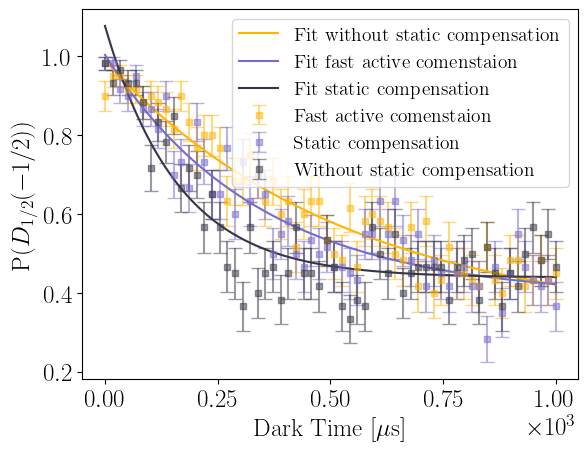

In [7]:
# plot
c = c_scheme()

# [x_dat, y_dat, y_dat_err, label, col, linestyle]
to_plot = [
    [ramsey136649_x, ramsey136649_y, ramsey136649_y_err, "Fast active comenstaion", c[0], ""],
    [ramsey136643_x, ramsey136643_y, ramsey136643_y_err, "Static compensation", c[7], ""],
    [ramsey136647_x, ramsey136647_y, ramsey136647_y_err, "Without static compensation", c[4], ""]
    ]

to_fit = [
    [x_fit_gaussian_ramsey136649, y_fit_gaussian_ramsey136649, "Fit without static compensation", c[0]], 
    [x_fit_gaussian_ramsey136643, y_fit_gaussian_ramsey136643, "Fit fast active comenstaion", c[7]],
    [x_fit_gaussian_ramsey136647, y_fit_gaussian_ramsey136647, "Fit static compensation", c[4]],
]

one_axis__N_Y_with_error_bars__with_N_fits(to_plot, to_fit, name_x=r"Dark Time [$\mu$s]", name_y=r"P$(D_{1/2}(-1/2))$", plot_title="", filename_to_save="python_figures/ramsey", marker_type="s", marker_size="5", capsize_errorbars=5, alpha_data=0.5, font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5)

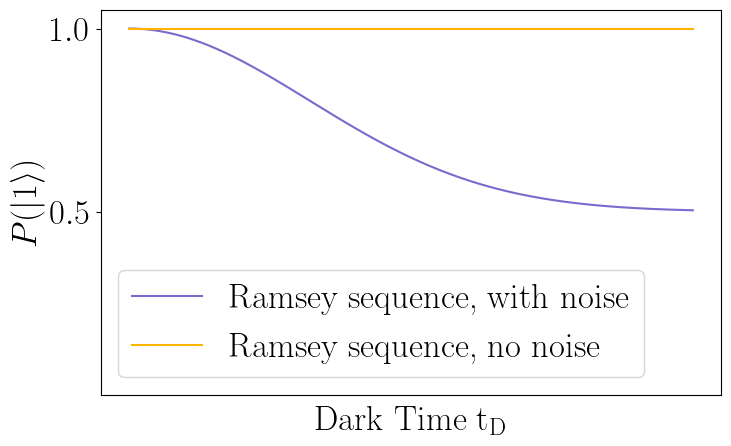

In [8]:
# ramsey theory

# Constants
T2 = 16.0  # Coherence time (decay time constant)

# Time array
t_D = np.linspace(0, 50, 1000)

# Ramsey signal (population in state |1> with random noise causing pure decoherence)
P_t = 0.5 * (1 + np.exp(-t_D / T2))
P_t = 0.5 * np.exp(-(t_D / (np.sqrt(2) * T2)) ** 2) + 0.5


font_size = 25
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t_D, P_t, label=r"Ramsey sequence, with noise", color=c_scheme()[7])
# plt.axhline(y=1, color='red', linestyle='--', label='Horizontal Line')
plt.plot(t_D, np.ones(len(t_D)), color=c_scheme()[0], label=r"Ramsey sequence, no noise")
plt.title("")
plt.xlabel(r"Dark Time $\text{t}_\text{D}$", fontsize=font_size)
plt.ylabel(r"$P(\vert 1 \rangle)$", fontsize=font_size)
plt.ylim(0, 1.051)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.xticks([], fontsize=font_size)  # Remove x-axis numbers
plt.yticks([0.5, 1], fontsize=font_size)
plt.legend(fontsize=25)
plt.savefig("python_figures/theory_ramsey.svg")
plt.show()


In [9]:


# import numpy as np

# import matplotlib.pyplot as plt

# import pandas as pd

# from scipy.optimize import curve_fit



# Function to read data from CSV with error
def read_csv_with_error(filename):
    data = pd.read_csv(filename, skiprows=1, usecols=[0, 1, 2], names=['XData', 'YData', 'YError'])
    return data['XData'].values, data['YData'].values, data['YError'].values

# New fitting function: f(x) = A * exp(-(x / (sqrt(2) * tau))^2) + C
def gaussian_decay(x, A, tau, C):
    """Gaussian decay function with parameters A, tau, and C."""
    return A * np.exp(-(x / (np.sqrt(2) * tau)) ** 2) + C

# Initial parameters for the fit
initial_params = (0.9, 200, 0.5)  # A=0.9, tau=200, C=0.5 for all files

# Define colors in hex format for each dataset
colors = ['#0D72BA', '#F19A26', '#76AC42']

# List of CSV files to read

files = [
    'data/ramsey/Ramsey136647.csv',
    'data/ramsey/Ramsey136643.csv',  # Replace with actual file paths
    'data/ramsey/Ramsey136649.csv'   # Replace with actual file paths
]

# Define custom labels for each dataset
custom_labels = [
    'no compensation',  
    'static compensation',    # Custom label for file 2
    'fast active compensation'  # Custom label for file 3
]

# Loop over the files and their corresponding initial parameters
for i, file in enumerate(files):
    # Read data from the current CSV file
    x_data, y_data, y_err = read_csv_with_error(file)

    # Filter data for fitting (only non-negative x values)
    valid_indices = x_data >= 0
    x_fit = x_data[valid_indices]
    y_fit = y_data[valid_indices]


    # Fit the data with the Gaussian decay function
    popt, pcov = curve_fit(gaussian_decay, x_fit, y_fit, p0=initial_params)

    # Generate the fitted Gaussian curve
    x_initial_fit = np.linspace(0, np.max(x_data), 500)  # Generate x values for fitting
    y_gaussian_fit = gaussian_decay(x_initial_fit, *popt)


    # Calculate the standard errors of the parameters
    perr = np.sqrt(np.diag(pcov))

    # Calculate lifetime and its error
    lifetime = np.sqrt(2 * np.log(2)) * popt[1]  # popt[1] corresponds to tau
    lifetime_error = np.sqrt(2 * np.log(2)) * perr[1]  # Error propagation

    # Print the optimized parameters and their errors
    print(f"Optimized Parameters for {custom_labels[i]}:")
    print(f"A (Amplitude): {popt[0]:.1f} ± {perr[0]:.1f}")
    print(f"tau (Decay Time): {popt[1]:.1f} ± {perr[1]:.1f}")
    print(f"C (Offset): {popt[2]:.1f} ± {perr[2]:.1f}")
    print(f"Lifetime: {lifetime:.1f} ± {lifetime_error:.1f} (us)\n")  # Printing the lifetime and its error





Optimized Parameters for no compensation:
A (Amplitude): 0.5 ± 0.0
tau (Decay Time): 139.8 ± 9.6
C (Offset): 0.5 ± 0.0
Lifetime: 164.6 ± 11.4 (us)

Optimized Parameters for static compensation:
A (Amplitude): 0.5 ± 0.0
tau (Decay Time): 226.9 ± 17.0
C (Offset): 0.5 ± 0.0
Lifetime: 267.1 ± 20.0 (us)

Optimized Parameters for fast active compensation:
A (Amplitude): 0.5 ± 0.0
tau (Decay Time): 284.2 ± 15.5
C (Offset): 0.5 ± 0.0
Lifetime: 334.6 ± 18.3 (us)



In [10]:
# fit

# New fitting function: f(x) = A * exp(-(x / (sqrt(2) * tau))^2) + C
def gaussian_decay(x, A, tau, C):
    """Gaussian decay function with parameters A, tau, and C."""
    return A * np.exp(-(x / (np.sqrt(2) * tau)) ** 2) + C

# guassian fit 3
initial_guess_gauss = [0.9, 200, 0.5]
x_fit_gaussian_ramsey136649 = np.linspace(min(ramsey136649_x), max(ramsey136649_x), 1000)
popt, pcov = curve_fit(gaussian_decay, ramsey136649_x, ramsey136649_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136649 = gaussian_decay(x_fit_gaussian_ramsey136649, *initial_guess_gauss)
y_fit_gaussian_ramsey136649 = gaussian_decay(x_fit_gaussian_ramsey136649, *popt)
# Print the optimized parameters and their errors
print(f"Optimized Parameters for {"guassian fit 2"}:")
print(f"A (Amplitude): {popt[0]:.1f} ± {perr[0]:.1f}")
print(f"tau (Life Time): {popt[1]:.1f} ± {perr[1]:.1f}")
print(f"C (Offset): {popt[2]:.1f} ± {perr[2]:.1f}")
lifetime = np.sqrt(2 * np.log(2)) * popt[1]  # popt[1] corresponds to tau
lifetime_error = np.sqrt(2 * np.log(2)) * perr[1]  # Error propagation
print(f"Coherence time: {lifetime:.1f} ± {lifetime_error:.1f} (us)\n") 

# guassian fit 1
initial_guess_gauss = [0.9, 200, 0.5]
x_fit_gaussian_ramsey136643 = np.linspace(min(ramsey136643_x), max(ramsey136643_x), 500)
popt, pcov = curve_fit(gaussian_decay, ramsey136643_x, ramsey136643_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136643 = gaussian_decay(x_fit_gaussian_ramsey136643, *initial_guess_gauss)
y_fit_gaussian_ramsey136643 = gaussian_decay(x_fit_gaussian_ramsey136643, *popt)
# Print the optimized parameters and their errors
print(f"Optimized Parameters for {"guassian fit 2"}:")
print(f"A (Amplitude): {popt[0]:.1f} ± {perr[0]:.1f}")
print(f"tau (Life Time): {popt[1]:.1f} ± {perr[1]:.1f}")
print(f"C (Offset): {popt[2]:.1f} ± {perr[2]:.1f}")
lifetime = np.sqrt(2 * np.log(2)) * popt[1]  # popt[1] corresponds to tau
lifetime_error = np.sqrt(2 * np.log(2)) * perr[1]  # Error propagation
print(f"Coherence time: {lifetime:.1f} ± {lifetime_error:.1f} (us)\n") 

# guassian fit 2
initial_guess_gauss = [0.9, 200, 0.5]
x_fit_gaussian_ramsey136647 = np.linspace(min(ramsey136647_x), max(ramsey136647_x), 1000)
popt, pcov = curve_fit(gaussian_decay, ramsey136647_x, ramsey136647_y, p0=initial_guess_gauss)
y_guess_gaussian_ramsey136647 = gaussian_decay(x_fit_gaussian_ramsey136647, *initial_guess_gauss)
y_fit_gaussian_ramsey136647 = gaussian_decay(x_fit_gaussian_ramsey136647, *popt)
# Print the optimized parameters and their errors
print(f"Optimized Parameters for {"guassian fit 2"}:")
print(f"A (Amplitude): {popt[0]:.1f} ± {perr[0]:.1f}")
print(f"tau (Life Time): {popt[1]:.1f} ± {perr[1]:.1f}")
print(f"C (Offset): {popt[2]:.1f} ± {perr[2]:.1f}")
lifetime = np.sqrt(2 * np.log(2)) * popt[1]  # popt[1] corresponds to tau
lifetime_error = np.sqrt(2 * np.log(2)) * perr[1]  # Error propagation
print(f"Coherence time: {lifetime:.1f} ± {lifetime_error:.1f} (us)\n") 


Optimized Parameters for guassian fit 2:
A (Amplitude): 0.5 ± 0.0
tau (Life Time): 284.2 ± 15.5
C (Offset): 0.5 ± 0.0
Coherence time: 334.6 ± 18.3 (us)

Optimized Parameters for guassian fit 2:
A (Amplitude): 0.5 ± 0.0
tau (Life Time): 226.9 ± 15.5
C (Offset): 0.5 ± 0.0
Coherence time: 267.1 ± 18.3 (us)

Optimized Parameters for guassian fit 2:
A (Amplitude): 0.5 ± 0.0
tau (Life Time): 139.8 ± 15.5
C (Offset): 0.5 ± 0.0
Coherence time: 164.6 ± 18.3 (us)



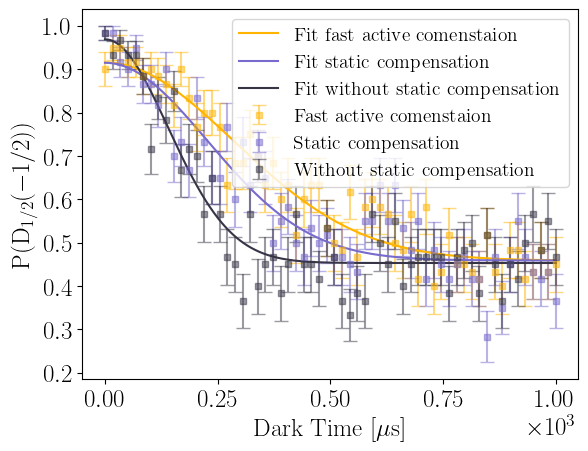

In [11]:

# [x_dat, y_dat, y_dat_err, label, col, linestyle]
to_plot_judith = [
    [ramsey136649_x, ramsey136649_y, ramsey136649_y_err, "Fast active comenstaion", c[0], ""],
    [ramsey136643_x, ramsey136643_y, ramsey136643_y_err, "Static compensation", c[7], ""],
    [ramsey136647_x, ramsey136647_y, ramsey136647_y_err, "Without static compensation", c[4], ""]
]

to_fit_judith = [
    [x_fit_gaussian_ramsey136649, y_fit_gaussian_ramsey136649, "Fit fast active comenstaion", c[0]], 
    [x_fit_gaussian_ramsey136643, y_fit_gaussian_ramsey136643, "Fit static compensation", c[7]],
    [x_fit_gaussian_ramsey136647, y_fit_gaussian_ramsey136647, "Fit without static compensation", c[4]],
]

one_axis__N_Y_with_error_bars__with_N_fits(to_plot_judith, to_fit_judith, name_x=r"Dark Time [$\mu$s]", name_y=r"P$(\text{D}_{1/2}(-1/2))$", plot_title="", filename_to_save="python_figures/ramsey", marker_type="s", marker_size="5", capsize_errorbars=5, alpha_data=0.5, font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5)
